In [8]:
pip install pyBigWig==0.2.7

     |████████████████████████████████| 49 kB 4.0 MB/s eta 0:00:011
  Created wheel for pyBigWig: filename=pyBigWig-0.2.7-cp39-cp39-macosx_10_9_x86_64.whl size=37408 sha256=fbcd0aaadb9605da070327a9d8947d2c75ec2459b9452601e25ca3d281e67c48
  Stored in directory: /Users/sidhu/Library/Caches/pip/wheels/20/42/5a/bc4c4f11ffd7e253fbaa62b9afdfff0eee272ac5817542f36d
Successfully built pyBigWig
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import libraries that are required to run your project
# You are allowed to add more libraries as you need

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import pyBigWig as pbw

## Work Package 1.1 - Modeling Choices & Data Pre-processing

In [ ]:
# TODO: 
# Load your feature (bed and/or bigwig and/or fasta) and target files (tsv) here.
# Decide which features to use for training. Feel free to process them however you need.

# NOTE: 
# bed and bigwig files contain signals of all chromosomes (including sex chromosomes).
# Training and validation split based on chromosomes has been done for you. 
# However, you can resplit the data in any way you want.

#path_data = "/path/to/your/data/files"  # TODO
path_data = "/Users/sidhu/Documents/GENOMICS/GENOMICS/Data/"
path_test = "/path/to/test/info/file"   # X3_test_info.tsv ; TODO
test_genes = pd.read_csv(path_test, sep='\t')
# ---------------------------INSERT CODE HERE---------------------------




# ---------------------------------------------------------------------- 

### 1.1.1 DATASET DESCRIPTION

### CAGE-train folder

We are given train_info and labels y for 3 different DNA strands X1, X2 & X3

### For X1 and X2

#### TRAIN DATA

##### train_info: 
contains the 14'310 entries each containing 7 values:

1. gene_name
2. chr number: contain all numbers [2, 22] \ {14, 19}
3. gene_start
4. gene_end
5. TSS_start
6. TSS_end
7. strand: if + we read from gene_start to gene_end, for - we read from gene_end to gene_start

##### train_y: 
contains also 14'310 entries with the label y representing GEX (gene expression)

#### VALIDATION DATA

The val_info and val_y follow the same procedure except that they only have 1974 entries and they only contain chromosom 19 & 14

### X3

For X3 we have 1984 entries again with 7 values given as in train_info except we only have chr 1.


## TODO:
1. What is difference between gene_starte/end and TSS_start/end.
2. What is strand +/- and do we need it?
3. You could have potentially multiple TSS in one gene, why not the case in the dataset?




In [3]:
tsv_path = "/Users/sidhu/Documents/GENOMICS/GENOMICS/Data/CAGE-train/"
X1_train_info = pd.read_csv(tsv_path + "X1_train_info.tsv", sep= '\t')
X1_train_y = pd.read_csv(tsv_path + "X1_train_y.tsv", sep= '\t')
X1_val_info = pd.read_csv(tsv_path + "X1_val_info.tsv", sep= '\t')
X1_val_y = pd.read_csv(tsv_path + "X1_val_y.tsv", sep= '\t')
X3_test_info = pd.read_csv(tsv_path + "X3_test_info.tsv", sep= '\t')

In [4]:
print(X1_train_info.shape)
print(X1_train_info.describe)
X1_train_info

(14310, 7)
<bound method NDFrame.describe of       gene_name    chr  gene_start   gene_end  TSS_start    TSS_end strand
0       SLC20A1   chr2   112645939  112663825  112658362  112658412      +
1      C11orf58  chr11    16613132   16758340   16738643   16738693      +
2        ZSCAN9   chr6    28224886   28233487   28225263   28225313      +
3          CD19  chr16    28931965   28939342   28931956   28932006      +
4       TMEM123  chr11   102396332  102470384  102452789  102452839      -
...         ...    ...         ...        ...        ...        ...    ...
14305     ACOX1  chr17    75941507   75979177   75955565   75955589      -
14306     MLXIP  chr12   122078756  122147344  122127887  122127937      +
14307     ASGR2  chr17     7101322    7115700    7114614    7114653      -
14308     OR5A1  chr11    59436469   59451380   59443143   59443193      +
14309      TLR3   chr4   186069155  186088073  186069154  186069204      +

[14310 rows x 7 columns]>


,gene_name,chr,gene_start,gene_end,TSS_start,TSS_end,strand
0,SLC20A1,chr2,112645939,112663825,112658362,112658412,+
1,C11orf58,chr11,16613132,16758340,16738643,16738693,+
2,ZSCAN9,chr6,28224886,28233487,28225263,28225313,+
3,CD19,chr16,28931965,28939342,28931956,28932006,+
4,TMEM123,chr11,102396332,102470384,102452789,102452839,-
...,...,...,...,...,...,...,...
14305,ACOX1,chr17,75941507,75979177,75955565,75955589,-
14306,MLXIP,chr12,122078756,122147344,122127887,122127937,+
14307,ASGR2,chr17,7101322,7115700,7114614,7114653,-
14308,OR5A1,chr11,59436469,59451380,59443143,59443193,+


### HOW Long are the TSS sequences

<AxesSubplot:ylabel='Frequency'>

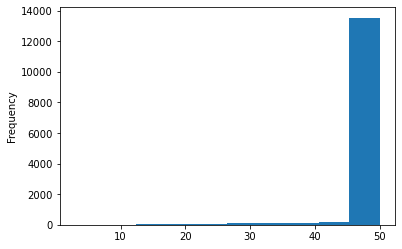

In [5]:
abs(X1_train_info['TSS_start'] - X1_train_info['TSS_end']).plot.hist()

### HOW Long are the gene sequences

<AxesSubplot:ylabel='Frequency'>

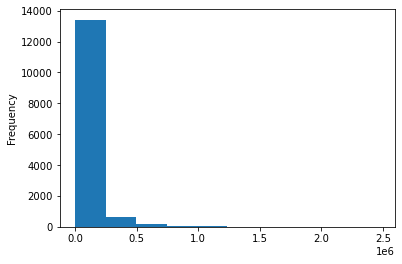

In [19]:
abs(X1_train_info['gene_start'] - X1_train_info['gene_end']).plot.hist()

In [8]:
print(X1_train_y.shape)
print(X1_train_y.describe)

<bound method NDFrame.describe of       gene_name          gex
0       SLC20A1     0.000000
1      C11orf58  2239.103328
2        ZSCAN9    19.798064
3          CD19   411.530623
4       TMEM123    34.214129
...         ...          ...
14305     ACOX1     0.000000
14306     MLXIP     0.000000
14307     ASGR2     0.000000
14308     OR5A1     0.000000
14309      TLR3     0.480536

[14310 rows x 2 columns]>

## All the different GEX which ranges from [0, 20'000] 

<AxesSubplot:xlabel='gene_name', ylabel='gex'>

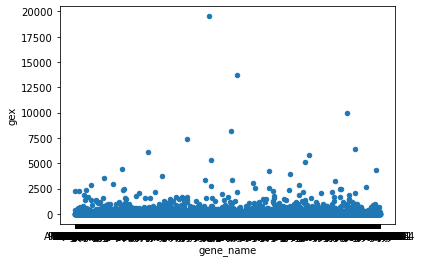

In [24]:
X1_train_y.plot.scatter(x='gene_name', y='gex')

In [6]:
X1_train_y.query

,gene_name,gex
0,SLC20A1,0.000000
1,C11orf58,2239.103328
2,ZSCAN9,19.798064
3,CD19,411.530623
4,TMEM123,34.214129
...,...,...
14305,ACOX1,0.000000
14306,MLXIP,0.000000
14307,ASGR2,0.000000
14308,OR5A1,0.000000


## DNase-bed Folder

This is our chromatin accessibility dataset.


The Dnase Folder has 3 Files X1.bed, X2.bed and X3.bed

The X1.bed has 56'451 entries with 10 values each
X2.bed has 181'145
X3.bed has 71'811

We have genderchromosome chrX and chrY also included in this data.


1. chromosom name
2. gene_start/TSS_start
3. gene_end/TSS_end
4. unknown
5. unknown
6. unknown
7. unknown
8. unknown
9. unknown
10. unknown

## TODO:

1. Determine what these unknown values are
2. Do we need the gender chromosome chrX and chrY



In [118]:
Dnase_bed_path = "/Users/sidhu/Documents/GENOMICS/GENOMICS/Data/DNase-bed/"
X1_dnase = pd.read_csv(Dnase_bed_path + "X1.bed", sep= '\t')
X2_dnase = pd.read_csv(Dnase_bed_path + "X2.bed", sep= '\t')
X3_dnase = pd.read_csv(Dnase_bed_path + "X3.bed", sep= '\t')

In [119]:
X1_dnase

,chr1,181405,181555,.,0,..1,12.379542683931337,-1,-1.1,75
0,chr1,267990,268140,.,0,.,12.379543,-1,-1,75
1,chr1,629160,629310,.,0,.,22.263896,-1,-1,75
2,chr1,629494,629644,.,0,.,10.732151,-1,-1,75
3,chr1,629870,630020,.,0,.,3603.694491,-1,-1,75
4,chr1,630155,630305,.,0,.,15.674327,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
56446,chrY,10627255,10627405,.,0,.,68.390877,-1,-1,75
56447,chrY,10994543,10994693,.,0,.,8.261062,-1,-1,75
56448,chrY,11302695,11302845,.,0,.,34.619337,-1,-1,75
56449,chrY,11329834,11329984,.,0,.,25.558680,-1,-1,75


In [120]:
#X1_dnase.loc[-1] = ['chr1', '181405', '181555', '.', '0', '..1', '12.379542683931337', '-1', '-1.1', '75']

# We add the first column to the dataframe
X1_dnase.loc[-1] = X1_dnase.columns
X1_dnase.index = X1_dnase.index + 1
X1_dnase = X1_dnase.sort_index()
# increase the index and sort to have the same config

# Add a descriptive index on the top
X1_dnase = X1_dnase.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')


# We will do the for the rest of the data as well
X2_dnase.loc[-1] = X2_dnase.columns
X2_dnase.index = X2_dnase.index + 1
X2_dnase = X2_dnase.sort_index()
X2_dnase = X2_dnase.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')

X3_dnase.loc[-1] = X3_dnase.columns
X3_dnase.index = X3_dnase.index + 1
X3_dnase = X3_dnase.sort_index()
X3_dnase = X3_dnase.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')



In [121]:
print(X1_dnase.loc[0])
#print(X2_dnase.loc[0])
#print(X3_dnase.loc[0])
X1_dnase

chr                         chr1
gene_start                181405
gene_end                  181555
unk                            .
unk                            0
unk                          ..1
unk           12.379542683931337
unk                           -1
unk                         -1.1
unk                           75
Name: 0, dtype: object


,chr,gene_start,gene_end,unk,unk,unk,unk,unk,unk,unk
1,chr1,267990,268140,.,0,.,12.379543,-1,-1,75
2,chr1,629160,629310,.,0,.,22.263896,-1,-1,75
3,chr1,629494,629644,.,0,.,10.732151,-1,-1,75
4,chr1,629870,630020,.,0,.,3603.694491,-1,-1,75
5,chr1,630155,630305,.,0,.,15.674327,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
56448,chrY,10994543,10994693,.,0,.,8.261062,-1,-1,75
56449,chrY,11302695,11302845,.,0,.,34.619337,-1,-1,75
56450,chrY,11329834,11329984,.,0,.,25.55868,-1,-1,75
56451,chrY,15355495,15355645,.,0,.,17.321719,-1,-1,75


In [123]:
X2_dnase.sort_index()

,chr,gene_start,gene_end,unk,unk,unk,unk,unk,unk,unk
0,chr1,181415,181565,.,0,..1,49.88189434009729,-1,-1.1,75
1,chr1,191435,191585,.,0,.,52.050523,-1,-1,75
2,chr1,267981,268131,.,0,.,10.846587,-1,-1,75
3,chr1,778655,778805,.,0,.,179.999586,-1,-1,75
4,chr1,779135,779285,.,0,.,12.292339,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
181141,chrY,26408676,26408826,.,0,.,9.400835,-1,-1,75
181142,chrY,26457840,26457990,.,0,.,5.063578,-1,-1,75
181143,chrY,26563057,26563207,.,0,.,7.232207,-1,-1,75
181144,chrY,56839220,56839370,.,0,.,23.13548,-1,-1,75


## H3* Folders

These are our Histone marks dataset

We have 6 .bed folder for different histones. In particular we have H3K4me1, H3K4me3, H3K9me3, H3K27ac, H3K27me3 & H3K36me3

H3K4me1 and H3K27ac are listed as active enhancers!

![alt text](histone.png "Title")

All the files have 3 .bed files for X1, X2 & X3 and are built the same for the expection of #entries

Example: H3k37ac.bed --> X1.bed


The X1_K27ac has 57'886, X2_K27ac has 76092, X3_K27ac has 54'473 entries each containing 10 values

1. chromosom name
2. gene_start/TSS_start
3. gene_end/TSS_end
4. Peak number
5. unknown
6. unknown
7. unknown
8. unknown
9. unknown
10. unknown


In [112]:
H3K27ac_bed_path = "/Users/sidhu/Documents/GENOMICS/GENOMICS/Data/H3K27ac-bed/"
X1_K27ac = pd.read_csv(H3K27ac_bed_path + "X1.bed", sep= '\t')
X2_K27ac = pd.read_csv(H3K27ac_bed_path + "X2.bed", sep= '\t')
X3_K27ac = pd.read_csv(H3K27ac_bed_path + "X3.bed", sep= '\t')

In [113]:
X1_K27ac.loc[-1] = X1_K27ac.columns
X1_K27ac.index = X1_K27ac.index + 1
X1_K27ac.sort_index()
X1_K27ac = X1_K27ac.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')

X2_K27ac.loc[-1] = X2_K27ac.columns
X2_K27ac.index = X2_K27ac.index + 1
X2_K27ac.sort_index()
X2_K27ac = X2_K27ac.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')

X3_K27ac.loc[-1] = X3_K27ac.columns
X3_K27ac.index = X3_K27ac.index + 1
X3_K27ac.sort_index()
X3_K27ac = X3_K27ac.set_axis(['chr', 'gene_start', 'gene_end', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk', 'unk' ], axis='columns')

In [114]:
X2_K27ac.loc[0]

chr                       chr10
gene_start            100020043
gene_end              100020177
unk                  Peak_82084
unk                          21
unk                           .
unk           16.22943969610636
unk                     3.82297
unk                      1.5382
unk                          36
Name: 0, dtype: object

In [115]:
H3K27me3_bed_path = "/Users/sidhu/Documents/GENOMICS/GENOMICS/Data/H3K27me3-bed/"
X1_K27me3 = pd.read_csv(H3K27me3_bed_path + "X1.bed", sep= '\t')
X2_K27me3 = pd.read_csv(H3K27me3_bed_path + "X2.bed", sep= '\t')
X3_K27me3 = pd.read_csv(H3K27me3_bed_path + "X3.bed", sep= '\t')

In [116]:
X1_K27me3

,chr10,100100915,100101123,Peak_17277,107,.,31.155124653739612,4.07966,0.66916,75
0,chr10,100140031,100140219,Peak_14127,127,.,34.003416,4.41054,0.88574,77
1,chr10,100566712,100566879,Peak_36184,53,.,25.393536,2.92767,0.12659,59
2,chr10,100567356,100567545,Peak_13190,131,.,36.565097,4.54974,0.98555,101
3,chr10,100570317,100570551,Peak_29275,68,.,28.896399,3.22608,0.25694,216
4,chr10,100571000,100571280,Peak_3317,205,.,44.566205,6.02366,1.73814,235
...,...,...,...,...,...,...,...,...,...,...
26894,chrX,74423063,74423242,Peak_24560,88,.,32.981163,3.68802,0.42361,43
26895,chrX,8731525,8731685,Peak_24561,88,.,32.981163,3.68802,0.42361,47
26896,chrX,8880394,8880658,Peak_5203,195,.,41.900185,5.88995,1.70396,100
26897,chrX,9788557,9788731,Peak_20095,107,.,33.413850,4.07966,0.66916,83


# MODEL

## INPUT

Our input is the following: 
0       SLC20A1   chr2   112645939  112663825  112658362  112658412      +

where we have the gene name, chr, gene start, end, TSS start, end, strand

## DATA

our data is the following:

### Chromatin Accessibility (DNase)

Here we have the following structure:
chr1	267990	268140	.	0	.	12.379543	-1	-1	75

### H3* Histone marks

chr10	100140031	100140219	Peak_14127	127	.	34.003416	4.41054	0.88574	77

## OUTPUT

our output has to look like this:
SLC20A1	0.000000

where we have gene name and GEX


## METHOD

### Preprocessing

The data has to be preprocessed

1. Remove Genderchromosom from Histone datasets
2. Sort dataset after chromosoms (optional but better for following)
3. Given our input, select a #features from the histone marks and chromatin accesibility datasets
4. The histone marks can only be found between [gene_start, TSS_start] and [gene_end, TSS_end].
5. The probability probably is multimodal
6. Use these features to perform standard linear regression and work up to more sophisticated models


### Bayesian Approach to preprocessing

We try to fit a combination of Linear_kernels or RBF_kernel on a single histone mark dataset and then sample from the distribution and pick the following features. Then with the selected features we perform a bayesian linear regression or GP and with bayesian learning/optimization we can select new features



## Work Package 1.2 - Model Building

In [ ]:
# TODO: 
# Select the best model to predict gene expression from the obtained features in WP 1.1.

# ---------------------------INSERT CODE HERE---------------------------




# ----------------------------------------------------------------------


## Work Package 1.3 - Prediction on Test Data (Evaluation Metric)

In [ ]:
# TODO:
# Using the model trained in WP 1.2, make predictions on the test data (chr 1 of cell line X3).
# Store predictions in a variable called "pred" which is a numpy array.

pred = None
# ---------------------------INSERT CODE HERE---------------------------




# ----------------------------------------------------------------------

# Check if "pred" meets the specified constrains
assert isinstance(pred, np.ndarray), 'Prediction array must be a numpy array'
assert np.issubdtype(pred.dtype, np.number), 'Prediction array must be numeric'
assert pred.shape[0] == len(test_genes), 'Each gene should have a unique predicted expression'

#### Store Predictions in the Required Format

In [ ]:
# Store predictions in a ZIP. 
# Upload this zip on the project website under "Your submission".
# Zip this notebook along with the conda environment (and README, optional) and upload this under "Your code".

save_dir = 'path/to/save/output/file'  # TODO
file_name = 'gex_predicted.csv'         # PLEASE DO NOT CHANGE THIS
zip_name = "Ramesh_Sidharth_Project1.zip" # TODO
save_path = f'{save_dir}/{zip_name}'
compression_options = dict(method="zip", archive_name=file_name)

test_genes['gex_predicted'] = pred.tolist()
test_genes[['gene_name', 'gex_predicted']].to_csv(save_path, compression=compression_options)